#Practical Applications of Convex Optimization: Modeling Daily Life with cvxpy

____
____

In [135]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

## Q1 : Appropriate Diet

### DATA:

In [136]:

N = 10
M = 5


B = [100.8, 52.1, 370.8, 200.5, 140 ]
C = [45.79, 30.86, 50.2 , 99.26, 32.17, 42.9 , 66.89, 35.06, 13.78, 53.78]
P = [
    [ 70,  5.12,  8.02,  1.89, 12.25],
    [0,  100,  7.62,  2.34, 17.48],
    [ 6.53, 0.1,  7.89,  200,  0.56],
    [0, 0.1,  0.896,  400, 0],
    [18.23,  1.  , 10.29,  9.21,  0.92],
    [ 2.45,  2.93,  2.24,  4.55,  8.87],
    [ 9.41, 13.1 ,  7.24,  0.24,  7.35],
    [19.21,  1.32, 12.35, 11.22,  5.14],
    [ 1.27, 11.66,  256,  1.14,  2.42],
    [11.37, 17.86,  33, 0,  100]
    ]

###Code:

In [137]:
B = np.array(B)
C = np.array(C)
P = np.array(P)
x = cp.Variable(N, nonneg=True)
cost = C@x
prob = cp.Problem(cp.Minimize(cost),[P.T @ x >= B])
optimal_value = prob.solve()
solution = x.value
print("Total Cost: ", optimal_value)
print("Individual Nutrient Amounts: ")
for i in range(solution.size):
  print(i, ": ", solution[i])
print("Total Amount of Nutrients:", sum(solution))

Total Cost:  186.15975086579414
Individual Nutrient Amounts: 
0 :  1.1297643018844044
1 :  0.10365541485180778
2 :  0.9836348500020738
3 :  2.8968000319932407e-09
4 :  0.0
5 :  0.0
6 :  0.0
7 :  0.0
8 :  1.2238778133193549
9 :  1.2083587087207013
Total Amount of Nutrients: 4.649291091675142


___

# Q2 : Project Management

### DATA:

In [127]:
N = 5
P = 2500
t = 800
R = 200
C = [2,  2.09,  4.45, 5.55,  1.52]
T = [3.57,  2.448, 2.69, 3.03,  9.55]
p = [100,8,35,90,20]

###Code:

In [128]:
C = np.array(C)
T = np.array(T)
p = np.array(p)
x = cp.Variable(N, nonneg = True)
cost = C@x
time_spent = T.T @ x
profit = p.T @ x
prob = cp.Problem(cp.Minimize(cost),[T.T @ x <= t, cp.sum(x) <= R, p.T @ x >= P])
optimal_value = prob.solve()
solution = x.value

print("Total Cost: ", optimal_value)
print("Resource Consumption Subject to the i-th Activity:")
for i in range(solution.size):
  print(i, ": ", solution[i])
print("Total Resource Consumption: ", sum(solution))
print("Total Time Spent: ", time_spent.value)
print("Total Profit: ", profit.value)

Total Cost:  50.000000020910484
Resource Consumption Subject to the i-th Activity:
0 :  25.00000000221313
1 :  2.2836783650277012e-09
2 :  1.0849480748189584e-09
3 :  9.315246229059792e-10
4 :  1.127208471951321e-09
Total Resource Consumption:  25.00000000764049
Total Time Spent:  89.2500000299972
Total Profit:  2500.0000003839373


### Bonus Homework

**Example 1: Allocate at Least 5x More Time to Task i Compared to Task j**


$$T_i x_i \geq 5 T_j x_j$$

where:

* $T_i$ represents the standard time required to complete task $i$.
* $x_i$ represents the decision variable for the task $i$
* $j$ is a specific index representing the task we compare $i$ to.

As an example we apply the given constraints for:

* $i = 0$
* $j = 2$

**Example 2: Allowed Time Window for Completing Task i**

$$t_1 \leq T_i x_i \leq t_2$$

where:

* $t_1$ represents the minimum allowed time to complete task $i$.
* $T_i$ represents the standard time required to complete task $i$.
* $x_i$ represents the decision variable for the task $i$ .
* $t_2$ represents the maximum allowed time to complete task $i$.

As an example we apply the given constraints for:

* $i = 4$
* $t_1 = 50$
* $t_2 = 150$

**Example 3: Minimum Required Time Allocation with Allowed Completion Window**

$$
\begin{cases}
T_i x_i \geq \gamma T_j x_j  \\
t_1 \leq T_i x_i \leq t_2
\end{cases}
$$

where:

* $\gamma$ is a constant representing the minimum time allocation ratio for activity $i$ relative to activity $j$ (e.g., $\gamma = 3$ for allocating at least 3 times more time).


**Example Constraints:**

$$
\begin{cases}
T_2 x_2 \geq 2 T_4 x_4  \\
200 \leq T_2 x_2 \leq 250
\end{cases}
$$

$$
\begin{cases}
T_4 x_4 \geq 0.5 T_1 x_1  \\
25 \leq T_1 x_1 \leq 50
\end{cases}
$$



In [129]:
print("Example 1: ")

prob = cp.Problem(cp.Minimize(cost),[T.T @ x <= t, cp.sum(x) <= R, p.T @ x >= P, T[0]*x[0]>=5*T[2]*x[2]])
optimal_value = prob.solve()
solution = x.value

print("Total Cost: ", optimal_value)
print("Resource Consumption Subject to the i-th Activity:")
for i in range(solution.size):
  print(i, ": ", solution[i])
print("Total Resource Consumption: ", sum(solution))
print("Total Time Spent: ", time_spent.value)
print("Total Profit: ", profit.value)
print("--------------------------------------------------------------------------------------------")

print("Example 2: ")

prob = cp.Problem(cp.Minimize(cost),[T.T @ x <= t, cp.sum(x) <= R, p.T @ x >= P, T[4]*x[4]>=50,T[4]*x[4]<=150])
optimal_value = prob.solve()
solution = x.value

print("Total Cost: ", optimal_value)
print("Resource Consumption Subject to the i-th Activity:")
for i in range(solution.size):
  print(i, ": ", solution[i])
print("Total Resource Consumption: ", sum(solution))
print("Total Time Spent: ", time_spent.value)
print("Total Profit: ", profit.value)

print("--------------------------------------------------------------------------------------------")

print("Example 3: ")

prob = cp.Problem(cp.Minimize(cost),[T.T @ x <= t, cp.sum(x) <= R, p.T @ x >= P, T[2]*x[2]>=200, T[2]*x[2]<=250, T[2]*x[2]>=2*T[4]*x[4], T[1]*x[1]>=25,T[1]*x[1]<=50, T[4]*x[4]>=2*T[1]*x[1]])
optimal_value = prob.solve()
solution = x.value

print("Total Cost: ", optimal_value)
print("Resource Consumption Subject to the i-th Activity:")
for i in range(solution.size):
  print(i, ": ", solution[i])
print("Total Resource Consumption: ", sum(solution))
print("Total Time Spent: ", time_spent.value)
print("Total Profit: ", profit.value)

print("--------------------------------------------------------------------------------------------")


Example 1: 
Total Cost:  50.00000004039006
Resource Consumption Subject to the i-th Activity:
0 :  25.000000006691533
1 :  3.150888125563795e-09
2 :  2.072186512137192e-09
3 :  2.01809266475307e-09
4 :  0.0
Total Resource Consumption:  25.000000013932702
Total Time Spent:  89.25000004329114
Total Profit:  2500.0000009485157
--------------------------------------------------------------------------------------------
Example 2: 
Total Cost:  55.86387435201601
Resource Consumption Subject to the i-th Activity:
0 :  23.95287958350528
1 :  2.904806017133442e-10
2 :  1.2901278373281627e-10
3 :  9.683394566361631e-11
4 :  5.235602094267645
Total Resource Consumption:  29.18848167828925
Total Time Spent:  135.5117801147214
Total Profit:  2500.0000002514353
--------------------------------------------------------------------------------------------
Example 3: 
Total Cost:  360.1570880218947
Resource Consumption Subject to the i-th Activity:
0 :  0.0
1 :  10.21241830177616
2 :  74.34944237882326

____

# Q3 : Portfolio Selection

### DATA:

In [130]:
mu = [19.12, 13.31, 18.4 , 19.56, 18.7 , 14.04, 15.21, 17.74, 19.88, 19.39]
Sigma = [
    [3.44, 2.76, 2.28, 2.35, 2.83, 1.98, 2.22, 2.65, 3.37, 2.49],
    [2.76, 3.68, 2.74, 2.26, 3.06, 1.73, 2.38, 2.16, 2.79, 2.13],
    [2.28, 2.74, 2.62, 1.66, 2.72, 1.43, 2.28, 2.04, 2.35, 1.8 ],
    [2.35, 2.26, 1.66, 2.88, 1.88, 2.14, 2.23, 2.12, 2.59, 2.71],
    [2.83, 3.06, 2.72, 1.88, 3.51, 1.69, 2.34, 2.48, 3.06, 2.13],
    [1.98, 1.73, 1.43, 2.14, 1.69, 2.82, 1.64, 2.57, 2.81, 2.26],
    [2.22, 2.38, 2.28, 2.23, 2.34, 1.64, 2.82, 1.92, 2.33, 2.57],
    [2.65, 2.16, 2.04, 2.12, 2.48, 2.57, 1.92, 3.06, 3.19, 2.24],
    [3.37, 2.79, 2.35, 2.59, 3.06, 2.81, 2.33, 3.19, 3.9 , 2.8 ],
    [2.49, 2.13, 1.8 , 2.71, 2.13, 2.26, 2.57, 2.24, 2.8 , 3.26]
       ]

###Code:

________________________
Lambda in (0,1]
________________________
Lambda =  0.1
Proportion of Budget Invested in i-th Asset: 
0 :  0.0
1 :  0.0
2 :  0.0
3 :  3.772873671152695e-07
4 :  2.0041658481299836e-08
5 :  0.0
6 :  1.6307750520748184e-07
7 :  0.0
8 :  1.000000684493628
9 :  0.0
Expected Retrun:  19.880023842662094
The Risk of the Suggested Portfolio :  3.9000081759995577
------------------------------------------------------------------------------------------------------
Lambda =  0.2
Proportion of Budget Invested in i-th Asset: 
0 :  0.0
1 :  1.3180136102456671e-22
2 :  0.0
3 :  0.3187499999999983
4 :  0.0
5 :  0.0
6 :  7.798830447516878e-22
7 :  0.0
8 :  0.6812500000000016
9 :  7.986012098593559e-22
Expected Retrun:  19.778
The Risk of the Suggested Portfolio :  3.2274375000000015
------------------------------------------------------------------------------------------------------
Lambda =  0.30000000000000004
Proportion of Budget Invested in i-th Asset: 
0 :  2.074957688647

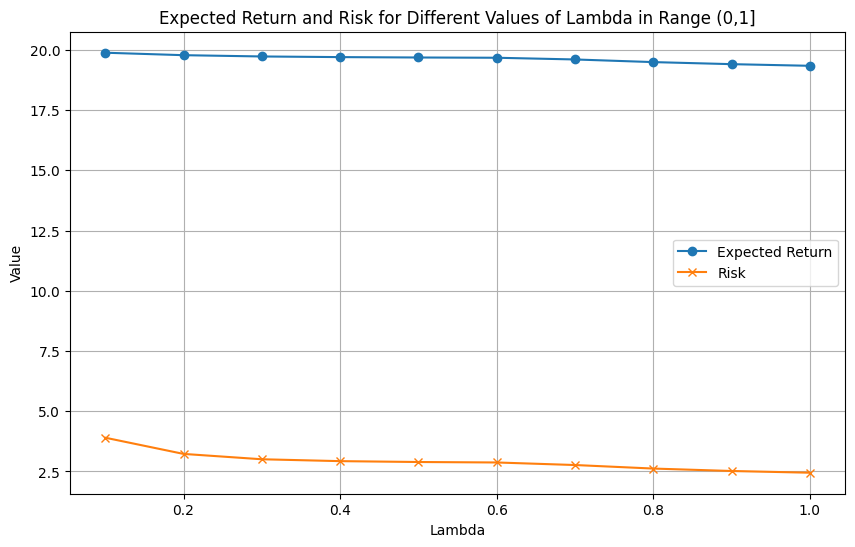

________________________
Lambda in [1,10]
________________________
Lambda =  1.0
Proportion of Budget Invested in i-th Asset: 
0 :  0.0
1 :  0.0
2 :  0.23065358442791556
3 :  0.6293717360341827
4 :  0.0
5 :  6.2829697711808e-23
6 :  0.0
7 :  6.47818594518995e-23
8 :  0.13997467953790177
9 :  0.0
Expected Retrun:  19.337233739515746
The Risk of the Suggested Portfolio :  2.446626839689825
------------------------------------------------------------------------------------------------------
Lambda =  2.0
Proportion of Budget Invested in i-th Asset: 
0 :  0.0
1 :  2.844660703028018e-23
2 :  0.42660550458715524
3 :  0.5733944954128447
4 :  6.820605802334063e-23
5 :  1.0593402418965514e-22
6 :  3.0286637867895353e-23
7 :  5.506764162740099e-23
8 :  2.278493932238015e-23
9 :  8.221703828839464e-23
Expected Retrun:  19.065137614678896
The Risk of the Suggested Portfolio :  2.235825688073395
------------------------------------------------------------------------------------------------------


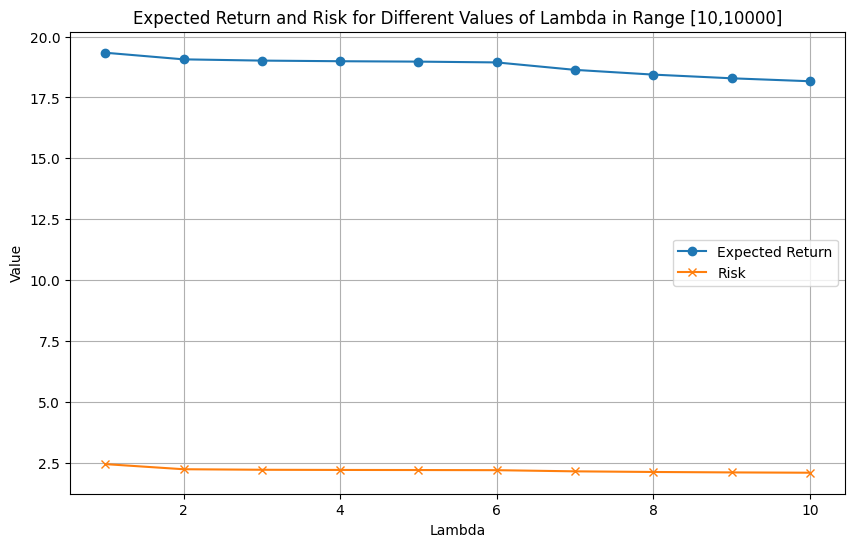

________________________
Lambda in [10,10000]
________________________
Lambda =  1.0
Proportion of Budget Invested in i-th Asset: 
0 :  0.0
1 :  0.0
2 :  0.23065358442791556
3 :  0.6293717360341827
4 :  0.0
5 :  6.2829697711808e-23
6 :  0.0
7 :  6.47818594518995e-23
8 :  0.13997467953790177
9 :  0.0
Expected Retrun:  19.337233739515746
The Risk of the Suggested Portfolio :  2.446626839689825
------------------------------------------------------------------------------------------------------
Lambda =  345.7931034482759
Proportion of Budget Invested in i-th Asset: 
0 :  7.147338693546912e-23
1 :  1.7049968852353295e-23
2 :  0.4784654809242636
3 :  0.1778718758697654
4 :  1.0536181358164098e-22
5 :  0.34366264320597095
6 :  0.0
7 :  1.0011295467897586e-22
8 :  1.2168972727383068e-22
9 :  0.0
Expected Retrun:  17.107962251630894
The Risk of the Suggested Portfolio :  2.038416230041169
------------------------------------------------------------------------------------------------------
L

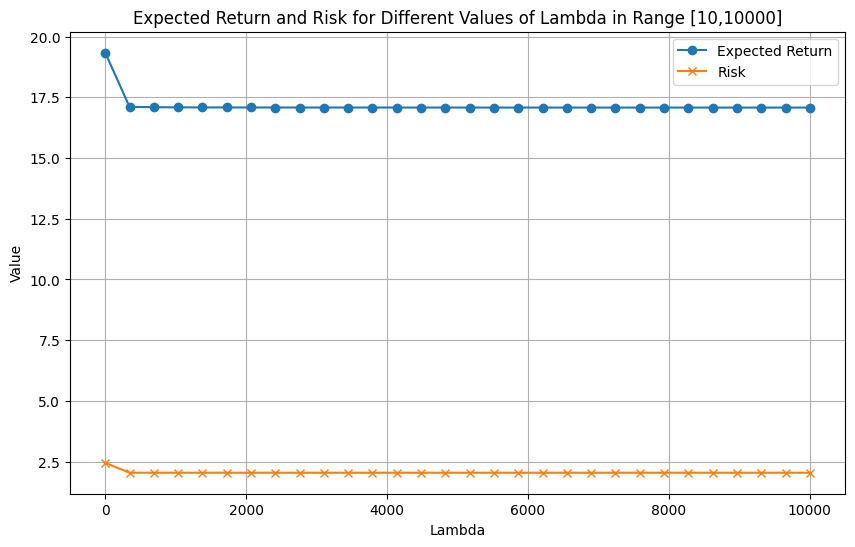

In [131]:
penalty = 1
mu = np.array(mu)
Sigma = np.array(Sigma)
n = mu.size
x = cp.Variable(n, nonneg = True)
print("________________________")
print("Lambda in (0,1]")
print("________________________")
expected_returns = []
risks = []
lambdas = np.linspace(0.1, 1, 10)
for lamb in lambdas:
  print("Lambda = ", lamb)
  penalty = lamb
  objective = mu.T @ x - penalty * cp.quad_form(x, Sigma)
  expected_return = mu.T @ x
  risk = cp.quad_form(x, Sigma)
  prob = cp.Problem(cp.Maximize(objective), [cp.sum(x) == 1, x<=1])
  optimal_value = prob.solve()
  solution = x.value
  print("Proportion of Budget Invested in i-th Asset: ")
  for i in range(n):
    print(i, ": ", solution[i])
  print("Expected Retrun: ", expected_return.value)
  expected_returns.append(expected_return.value)
  print("The Risk of the Suggested Portfolio : ", risk.value)
  risks.append(risk.value)
  print("------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(10, 6))
plt.plot(lambdas, expected_returns, marker='o', label='Expected Return')
plt.plot(lambdas, risks, marker='x', label='Risk')
plt.xlabel('Lambda')
plt.ylabel('Value')
plt.title('Expected Return and Risk for Different Values of Lambda in Range (0,1]')
plt.legend()
plt.grid(True)
plt.show()


print("________________________")
print("Lambda in [1,10]")
print("________________________")
expected_returns = []
risks = []
lambdas = np.linspace(1, 10, 10)
for lamb in lambdas:
  print("Lambda = ", lamb)
  penalty = lamb
  objective = mu.T @ x - penalty * cp.quad_form(x, Sigma)
  expected_return = mu.T @ x
  risk = cp.quad_form(x, Sigma)
  prob = cp.Problem(cp.Maximize(objective), [cp.sum(x) == 1, x<=1])
  optimal_value = prob.solve()
  solution = x.value
  print("Proportion of Budget Invested in i-th Asset: ")
  for i in range(n):
    print(i, ": ", solution[i])
  print("Expected Retrun: ", expected_return.value)
  expected_returns.append(expected_return.value)
  print("The Risk of the Suggested Portfolio : ", risk.value)
  risks.append(risk.value)
  print("------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(10, 6))
plt.plot(lambdas, expected_returns, marker='o', label='Expected Return')
plt.plot(lambdas, risks, marker='x', label='Risk')
plt.xlabel('Lambda')
plt.ylabel('Value')
plt.title('Expected Return and Risk for Different Values of Lambda in Range [10,10000]')
plt.legend()
plt.grid(True)
plt.show()

print("________________________")
print("Lambda in [10,10000]")
print("________________________")
expected_returns = []
risks = []
lambdas = np.linspace(1, 10000, 30)
for lamb in lambdas:
  print("Lambda = ", lamb)
  penalty = lamb
  objective = mu.T @ x - penalty * cp.quad_form(x, Sigma)
  expected_return = mu.T @ x
  risk = cp.quad_form(x, Sigma)
  prob = cp.Problem(cp.Maximize(objective), [cp.sum(x) == 1, x<=1])
  optimal_value = prob.solve()
  solution = x.value
  print("Proportion of Budget Invested in i-th Asset: ")
  for i in range(n):
    print(i, ": ", solution[i])
  print("Expected Retrun: ", expected_return.value)
  expected_returns.append(expected_return.value)
  print("The Risk of the Suggested Portfolio : ", risk.value)
  risks.append(risk.value)
  print("------------------------------------------------------------------------------------------------------")

plt.figure(figsize=(10, 6))
plt.plot(lambdas, expected_returns, marker='o', label='Expected Return')
plt.plot(lambdas, risks, marker='x', label='Risk')
plt.xlabel('Lambda')
plt.ylabel('Value')
plt.title('Expected Return and Risk for Different Values of Lambda in Range [10,10000]')
plt.legend()
plt.grid(True)
plt.show()

### Bonus Homework:
**Example 1: Individual Asset Weight Lower Bound**

A lower bound can be set on the weight of specific assets.

$$x_i \geq \ell_i$$

where:

* $x_i$ represents the weight of asset $i$ in the portfolio (typically a value between 0 and 1).
* $\ell_i$ represents the minimum allowed weight for asset $i$ (often a non-negative value).

**Example (i = 7, 8):**

For assets 7 and 8, we want to enforce a minimum weight of 0.2:

$$x_7 \geq 0.2$$
$$x_8 \geq 0.2$$

**Example 2: Individual Asset Weight Upper Bound**

An upper bound can be imposed to limit the weight of certain assets. The constraint is written as:

$$x_j \leq m_j$$

where:

* $x_j$ represents the weight of asset $j$ in the portfolio.
* $m_j$ represents the maximum allowed weight for asset $j$ (typically a value between 0 and 1).

**Example (j = 1, 2, 3):**

For assets 1, 2, and 3, the maximum weight for each is set to 0.1:

$$x_1 \leq 0.1$$
$$x_2 \leq 0.1$$
$$x_3 \leq 0.1$$

**Example 3: Combined Asset Weight Constraint**

We can limit the combined weight of multiple assets. The constraint is:

$$\sum_{i \in I} x_i \leq \alpha$$

where:

* $x_i$ represents the weight of asset $i$ in the portfolio.
* $I$ is a set of asset indices for which the weight limitation applies (e.g., $I = \{5, 6\}$).
* $\alpha$ represents the maximum allowed total weight for assets in set $I$.

**Example (x_5 and x_6):**

The combined weight of assets 5 and 6 should not exceed 0.6:

$$x_5 + x_6 \leq 0.6$$

**Example 4: Lower Bound on Combined Asset Weight**

A lower bound can also be applied to the combined weight of multiple assets:

$$\sum_{i \in I} x_i \geq \beta$$

where:

* The symbols have the same meaning as in the previous example.
* $\beta$ represents the minimum required total weight for assets in set $I$.

**Example (x_5 and x_6):**

The combined weight of assets 5 and 6 must be at least 0.5:

$$x_5 + x_6 \geq 0.5$$

**Example 5: Mixed Asset Weight Constraints**

This example demonstrates combining individual and combined weight constraints. Here, we have three sets of constraints:

1. **Combined Weight Constraint for x_0 and x_1:**


$$0.3 \leq x_0 + x_1 \leq 0.7$$

2. **Individual Weight Upper Bound for x_j (j = 1, 2, 3):**

$$x_j \leq 0.1$$  for j = 1, 2, 3

3. **Individual Weight Lower Bound for x_i (i = 7, 8):**


$$x_i \geq 0.2$$  for i = 7, 8



In [132]:
penalty = 1
objective = mu.T @ x - penalty * cp.quad_form(x, Sigma)
expected_return = mu.T @ x
risk = cp.quad_form(x, Sigma)
print("Solving Exapmple 1:")
index = [7,8]
constraints = [cp.sum(x) == 1, x <= 1]
for i in range(n):
    if i in index:
        constraints.append(x[i] >= 0.2)
prob = cp.Problem(cp.Maximize(objective), constraints)
optimal_value = prob.solve()
solution = x.value
print("Proportion of Budget Invested in i-th Asset: ")
for i in range(n):
  print(i, ": ", solution[i])
print("Expected Retrun: ", expected_return.value)
expected_returns.append(expected_return.value)
print("The Risk of the Suggested Portfolio : ", risk.value)
risks.append(risk.value)
print("------------------------------------------------------------------------------------------------------")

print("Solving Exapmple 2:")
index = [1,2,3]
constraints = [cp.sum(x) == 1, x <= 1]
for i in range(n):
    if i in index:
        constraints.append(x[i] <= 0.1)
prob = cp.Problem(cp.Maximize(objective), constraints)
optimal_value = prob.solve()
solution = x.value
print("Proportion of Budget Invested in i-th Asset: ")
for i in range(n):
  print(i, ": ", solution[i])
print("Expected Retrun: ", expected_return.value)
expected_returns.append(expected_return.value)
print("The Risk of the Suggested Portfolio : ", risk.value)
risks.append(risk.value)
print("------------------------------------------------------------------------------------------------------")

print("Solving Exapmple 3:")
constraints = [cp.sum(x) == 1, x <= 1, x[5]+x[6] <= 0.6]
prob = cp.Problem(cp.Maximize(objective), constraints)
optimal_value = prob.solve()
solution = x.value
print("Proportion of Budget Invested in i-th Asset: ")
for i in range(n):
  print(i, ": ", solution[i])
print("Expected Retrun: ", expected_return.value)
expected_returns.append(expected_return.value)
print("The Risk of the Suggested Portfolio : ", risk.value)
risks.append(risk.value)
print("------------------------------------------------------------------------------------------------------")

print("Solving Exapmple 4:")
constraints = [cp.sum(x) == 1, x <= 1, x[5]+x[6] >= 0.5]
prob = cp.Problem(cp.Maximize(objective), constraints)
optimal_value = prob.solve()
solution = x.value
print("Proportion of Budget Invested in i-th Asset: ")
for i in range(n):
  print(i, ": ", solution[i])
print("Expected Retrun: ", expected_return.value)
expected_returns.append(expected_return.value)
print("The Risk of the Suggested Portfolio : ", risk.value)
risks.append(risk.value)
print("------------------------------------------------------------------------------------------------------")

print("Solving Exapmple 5:")
l_index = [1,2,3]
g_index = [7,8]
constraints = [cp.sum(x) == 1, x <= 1, 0.3 <= x[0] + x[1], x[0] + x[1] <= 0.7]
for i in range(n):
  if i in l_index:
    constraints.append(x[i] <= 0.1)
  elif i in g_index:
    constraints.append(x[i] >= 0.2)

prob = cp.Problem(cp.Maximize(objective), constraints)
optimal_value = prob.solve()
solution = x.value
print("Proportion of Budget Invested in i-th Asset: ")
for i in range(n):
  print(i, ": ", solution[i])
print("Expected Retrun: ", expected_return.value)
expected_returns.append(expected_return.value)
print("The Risk of the Suggested Portfolio : ", risk.value)
risks.append(risk.value)
print("------------------------------------------------------------------------------------------------------")


Solving Exapmple 1:
Proportion of Budget Invested in i-th Asset: 
0 :  8.69450454706584e-24
1 :  1.2211876991641968e-22
2 :  0.09908256880733896
3 :  0.5009174311926611
4 :  4.502209152327046e-23
5 :  1.2182624162111615e-22
6 :  7.121434660472566e-23
7 :  0.20000000000000004
8 :  0.20000000000000004
9 :  0.0
Expected Retrun:  19.145064220183485
The Risk of the Suggested Portfolio :  2.564462385321102
------------------------------------------------------------------------------------------------------
Solving Exapmple 2:
Proportion of Budget Invested in i-th Asset: 
0 :  0.0
1 :  0.0
2 :  0.1
3 :  0.10000000000000002
4 :  0.033123266952358815
5 :  6.0921006830112625e-24
6 :  2.274667131460729e-22
7 :  0.0
8 :  0.33587093521552613
9 :  0.43100579783211507
Expected Retrun:  19.44972170405848
The Risk of the Suggested Portfolio :  2.828257474161833
------------------------------------------------------------------------------------------------------
Solving Exapmple 3:
Proportion of Budge